# Representation gradient

We shall simulate assemblies that have to make decisions collectively. They do this by voting, one person, one vote. Decisions can have two or more choices, and citizens have a level of wisdom. Wise citizens have a larger probability of making the "right" choice, which in this simulation is simply the first in a list of choices.


In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

## Citizen agent definition


In [2]:
class Citizen:
    
    def __init__(self, max_wisdom, choices):

        # when born, citizens have a random level of wisdom, up to max_wisdom
        self.wisdom = random.uniform(0, max_wisdom)
        
        if random.random() <= self.wisdom:
            # wise agents choose wisely (first item is always the best choice)
            self.preference = choices[0]
        else:
            # unwise agents choose randomly
            self.preference = random.choice(choices)        
        
    def __repr__(self):
        """
        String representation of a Citizen object
        """
        return u"Citizen #%s, preference: %s, wisdom: %0.2f" % (id(self),
                                                                self.preference,
                                                                self.wisdom)

## Assembly model

An assembly is made up of a group of citizens, with a certain level of wisdom. It faces two or more choices.

In [3]:
class Assembly:

    def __init__(self, N=100,
                 num_choices=2,
                 max_wisdom = 0.2):
        
        assert num_choices >= 2
        self.choices = list(range(num_choices))
        
        self.citizens = [Citizen(max_wisdom, choices=self.choices)
                         for n in range(N)]    
    
    def tally(self):
        """
        Count votes for each choice
        """
        return {p: [c.preference for c in self.citizens].count(p)
                for p in self.choices}
    
    def outcome(self):
        """
        Return the choice with the highest vote count
        """
        return sorted(self.tally().items(),
                      key=lambda x: x[1],
                      reverse=True)[0]

    def tally_bar_plot(self):
        plt.bar([str(t) for t in self.tally().keys()], self.tally().values(), color=['yellow', 'purple'])
        plt.show()

Let's try the assembly model, with default values of 100 citizens with a maximum level of wisdom of 0.2 that face two choices.

In [4]:
A = Assembly()
# show the first ten citizens
A.citizens[:10]

[Citizen #139818194479816, preference: 0, wisdom: 0.13,
 Citizen #139818194479760, preference: 0, wisdom: 0.16,
 Citizen #139818194479088, preference: 1, wisdom: 0.03,
 Citizen #139818194479200, preference: 0, wisdom: 0.02,
 Citizen #139818194479144, preference: 1, wisdom: 0.01,
 Citizen #139818194479256, preference: 1, wisdom: 0.15,
 Citizen #139818194479480, preference: 1, wisdom: 0.16,
 Citizen #139818194479368, preference: 1, wisdom: 0.16,
 Citizen #139818194478696, preference: 0, wisdom: 0.18,
 Citizen #139818194478080, preference: 1, wisdom: 0.02]

In [5]:
# one person, one vote, tallied up. Choices are integers 0, 1, ...
A.tally()

{0: 57, 1: 43}

In [6]:
A.tally_bar_plot()


## Simulate across scenarios

From zero wisdom to total wisdom, from two choices to many choices.

A combination of number of choices and level of wisdom results in a given outcome. We'll count the tally for the first choice in the list of choices, which by design is always the "best" choice, known to us but not to simulated citizens.

In [7]:
sim = {'choices': [], 'wisdom': [], 'outcome': []}

for experiment in range(10):   # ten experiments for each combination of choices and wisdom
    for num_choices in range(2, 12):
        for max_wisdom in np.linspace(0, 1, 30):   # thirty levels of wisdom
            A = Assembly(num_choices=num_choices, max_wisdom=max_wisdom)
            sim['choices'].append(num_choices)
            sim['wisdom'].append(max_wisdom)
            sim['outcome'].append(A.tally()[0])

Fewer choices increase the probability of a good outcome, regardless of wisdom. As choices increase, wisdom is more important. This is typical of wicked problems.

## Outcomes

In the following scatterplot the size of the mark represents how many citizens chose the best option. As choices increase wisdom determines good outcomes.

outcomes scatterplot


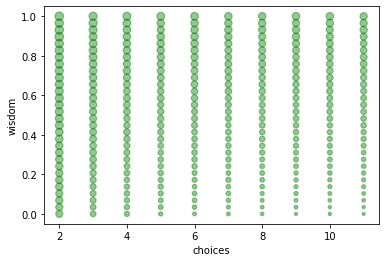

In [8]:
plt.scatter(sim['choices'], sim['wisdom'], s=sim['outcome'], color='green', alpha=0.05)
plt.xlabel("choices")
plt.ylabel("wisdom")
print('outcomes scatterplot')

Facing a wicked problem with no wisdom leads to bad outcomes.

![bad outcomes](wicked_problem_no_wisdom.png)

Explore the dataset with the following interactive parallel coordinates widget.

In [9]:
import plotly.express as px
fig = px.parallel_coordinates(pd.DataFrame(sim), color='outcome')
fig.show()